<a href="https://colab.research.google.com/github/isil-ada/Classification-With-LogisticRegression/blob/main/Classification_With_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# **(1) Examining the data set**

In [141]:
df = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv')

In [142]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [144]:
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0


In [145]:
df = df.drop(['ID'], axis=1)

**Create X & y**

In [146]:
X = df.drop(['Personal Loan'], axis=1)
y = df['Personal Loan']

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


# **(2) Training the model**

In [148]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [150]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# **(3) Evaluation of results: test**

In [151]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.955


Confusion Matrix:
 [[884  11]
 [ 34  71]] 



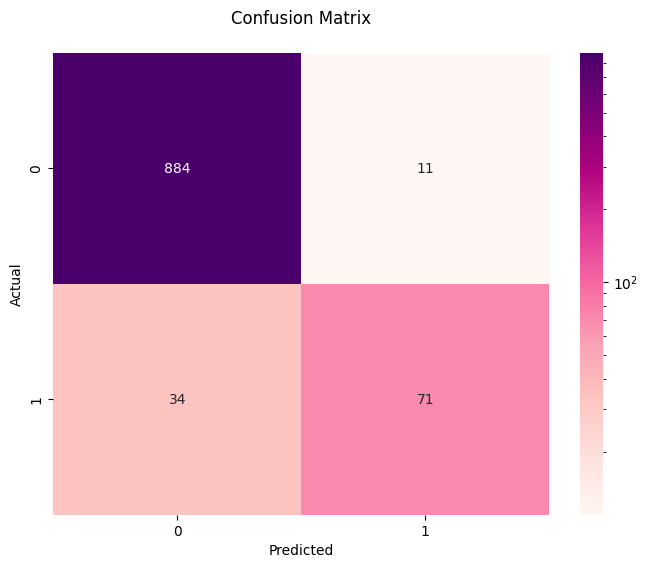

In [152]:
conf_matrix = confusion_matrix(y_test, model.predict(X_test))
print("Confusion Matrix:\n", conf_matrix, "\n")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdPu', norm=plt.matplotlib.colors.LogNorm())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\n')
plt.show()

In [153]:
# Detailed performance report
class_report = classification_report(y_test, model.predict(X_test))
print("Classification Report:\n", class_report, "\n")


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       895
           1       0.87      0.68      0.76       105

    accuracy                           0.95      1000
   macro avg       0.91      0.83      0.87      1000
weighted avg       0.95      0.95      0.95      1000
 



# **(4) Hyperparameter Tuning**

In [154]:
# Hyperparameter grid for Logistic Regression
param_grid = [
    # for liblinear solver
    {
        'penalty': ['l1', 'l2'], # Regularization type
        'solver': ['liblinear'], # Algorithm for optimization
        'C': [0.001, 0.01, 0.1, 1, 10, 100], # Regularization strength
        'max_iter': [200, 500, 1000], # Maximum number of iterations
        'class_weight': ['balanced', None] # For unbalanced data, use 'balanced'/ Handle class imbalance by adjusting weights
    },
    # for lbfgs solver
    {
        'penalty': ['l2', None],
        'solver': ['lbfgs'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [200, 500, 1000],
        'class_weight': ['balanced', None]
    },
    # For Saga Solver (the most comprehensive)
    {
        'penalty': ['l1', 'l2', None],
        'solver': ['saga'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [500, 1000, 2000],
        'class_weight': ['balanced', None]
    },
    # Separate [params] for saga + elasticnet
    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'C': [0.01, 0.1, 1, 10],
        'l1_ratio': [0.3, 0.5, 0.7], # ElasticNet mixing parameter (0 for L2, 1 for L1)
        'max_iter': [1000, 2000],
        'class_weight': ['balanced', None]
    }
]

print("The Parameter grid has been created:")
print(param_grid)

The Parameter grid has been created:
[{'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [200, 500, 1000], 'class_weight': ['balanced', None]}, {'penalty': ['l2', None], 'solver': ['lbfgs'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [200, 500, 1000], 'class_weight': ['balanced', None]}, {'penalty': ['l1', 'l2', None], 'solver': ['saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [500, 1000, 2000], 'class_weight': ['balanced', None]}, {'penalty': ['elasticnet'], 'solver': ['saga'], 'C': [0.01, 0.1, 1, 10], 'l1_ratio': [0.3, 0.5, 0.7], 'max_iter': [1000, 2000], 'class_weight': ['balanced', None]}]


In [155]:
# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid,
    cv=5, # 5-fold cross validation
    scoring='accuracy', # Metric
    verbose=2, # show progress
    n_jobs=-1 # Utilize all CPU cores
)

# Train the model with grid search
print("Initializing Grid Search...")
grid_search.fit(X_train, y_train)
print("\nGrid Search completed!")

Initializing Grid Search...
Fitting 5 folds for each of 300 candidates, totalling 1500 fits

Grid Search completed!


In [156]:
# Show best parameters
print("===> Best Parameters:", grid_search.best_params_)
print("\n===> Best Score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_
print("\n-> Best model obtained!")

===> Best Parameters: {'C': 0.1, 'class_weight': None, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}

===> Best Score: 0.9512500000000002

-> Best model obtained!


In [157]:
# Evaluate on the test set
y_pred_tuned = best_model.predict(X_test)
test_accuracy = best_model.score(X_test, y_test)

print(f"Test Accuracy tuned model): {test_accuracy:.4f}")
print(f"Test Accuracy (original model): {accuracy:.4f}")
print(f"Improvement: {(test_accuracy-accuracy):.4f}")


Test Accuracy tuned model): 0.9560
Test Accuracy (original model): 0.9550
Improvement: 0.0010


Confusion Matrix (Hyperparameter Tuned):
 [[888   7]
 [ 37  68]] 



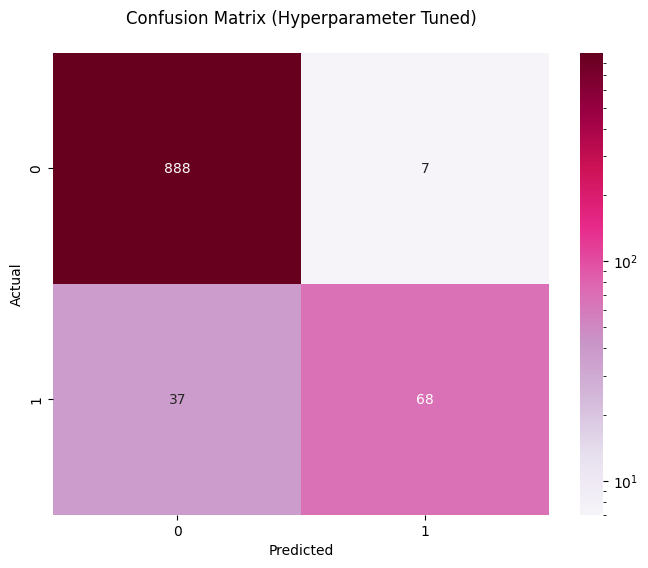

In [158]:
# Confusion Matrix
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
print("Confusion Matrix (Hyperparameter Tuned):\n", conf_matrix_tuned, "\n")

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='PuRd', norm=plt.matplotlib.colors.LogNorm())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Hyperparameter Tuned)\n')
plt.show()

In [166]:
# Detailed performance report (Tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned)
print("Classification Report (Tuned):\n\n", class_report_tuned )

Classification Report (Tuned):

               precision    recall  f1-score   support

           0       0.96      0.99      0.98       895
           1       0.91      0.65      0.76       105

    accuracy                           0.96      1000
   macro avg       0.93      0.82      0.87      1000
weighted avg       0.95      0.96      0.95      1000



In [167]:
# Original vs Tuned Model Comparison
comparison = pd.DataFrame({
    'Model': ['Original', 'Tuned'],
    'Test Accuracy': [accuracy, test_accuracy],
    'Improvement': [0, test_accuracy - accuracy]
})

In [168]:
comparison

,Model,Test Accuracy,Improvement
0,Original,0.955,0.000
1,Tuned,0.956,0.001


   Metric  Original    Tuned
 Accuracy  0.955000 0.956000
Precision  0.865854 0.906667
   Recall  0.676190 0.647619
 F1-Score  0.759358 0.755556 



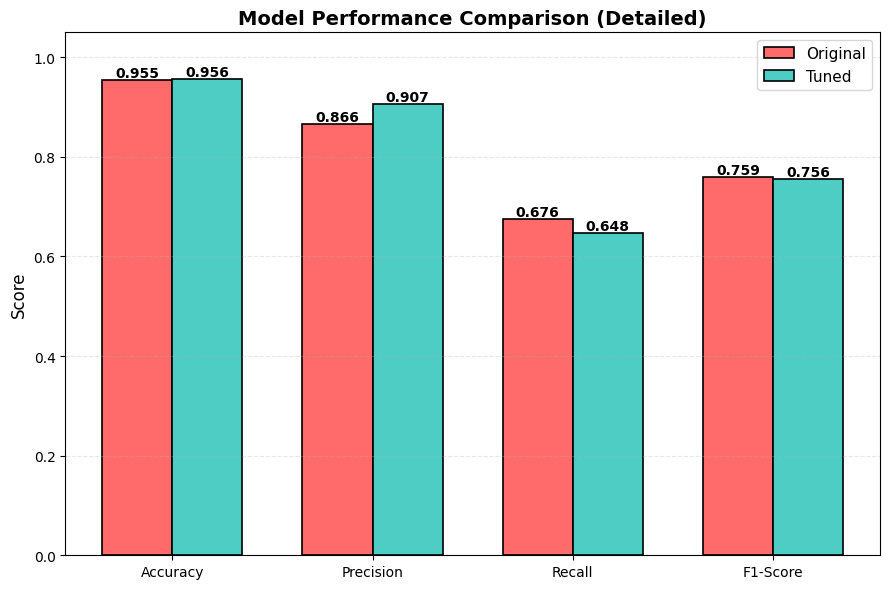

In [169]:
# Original model predictions
y_pred_original = model.predict(X_test)

# Metrics
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Original': [
        accuracy,
        precision_score(y_test, y_pred_original),
        recall_score(y_test, y_pred_original),
        f1_score(y_test, y_pred_original)
    ],
    'Tuned': [
        test_accuracy,
        precision_score(y_test, y_pred_tuned),
        recall_score(y_test, y_pred_tuned),
        f1_score(y_test, y_pred_tuned)
    ]
})

print(metrics.to_string(index=False),"\n")

# Visualization
fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(len(metrics['Metric']))
width = 0.35

bars1 = ax.bar(x - width/2, metrics['Original'], width, label='Original',
               color='#FF6B6B', edgecolor='black', linewidth=1.2)
bars2 = ax.bar(x + width/2, metrics['Tuned'], width, label='Tuned',
               color='#4ECDC4', edgecolor='black', linewidth=1.2)

# Write the values ​​on the bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance Comparison (Detailed)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics['Metric'])
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim([0, 1.05])

plt.tight_layout()
plt.show()